# BERT Pre-trained based NER model

### Installing dependencies
- Transformers for BERT pre-trained model



In [219]:
#!pip install pandas transformers tensorflow scikit-learn

### Setup

In [220]:
import tensorflow as tf
from transformers import BertTokenizer, TFBertForTokenClassification
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import numpy as np
import pandas as pd
from transformers import BertTokenizerFast
from transformers import TFBertModel
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [221]:
# Temporary data in format:
"""
[
  ["id", "Sentence", "Desired Word", "POS", "Tag"]
]
"""

' \n[\n  ["id", "Sentence", "Desired Word", "POS", "Tag"]\n]\n'

In [222]:
data = [
    ["NN", "Mount", "Mountain"],
    ["NN", "Everest", "Mountain"],
    ["NNP", "K2", "Mountain"],
    ["NN", "Kangchenjunga", "Mountain"],
    ["NNP", "Lhotse", "Mountain"],
    ["NNP", "Makalu", "Mountain"],
    ["NN", "Cho", "Mountain"],
    ["NN", "Oyu", "Mountain"],
    ["NNP", "Dhaulagiri", "Mountain"],
    ["NNP", "Manaslu", "Mountain"],
    ["NNP", "Nanga", "Mountain"],
    ["NNP", "Parbat", "Mountain"],
    ["NNP", "Annapurna", "Mountain"],
    ["NN", "Gasherbrum", "Mountain"],
    ["NN", "Broad", "Mountain"],
    ["NNP", "Peak", "Mountain"],
    ["NN", "Gasherbrum", "Mountain"],
    ["NNP", "Shishapangma", "Mountain"],
    ["NN", "Masherbrum", "Mountain"],
    ["NNP", "Rakaposhi", "Mountain"],
    ["NNP", "Tirich", "Mountain"],
    ["NNP", "Mir", "Mountain"],
    ["NNP", "Namcha", "Mountain"],
    ["NNP", "Barwa", "Mountain"],
    ["NNP", "Gangkhar", "Mountain"],
    ["NNP", "Puensum", "Mountain"],
    ["NNP", "Jomolhari", "Mountain"],
    ["NNP", "Yerupaja", "Mountain"],
    ["NNP", "Coropuna", "Mountain"],
    ["NNP", "Huascarán", "Mountain"],
    ["NNP", "Alpamayo", "Mountain"],
    ["NNP", "Artesonraju", "Mountain"],
    ["NNP", "Aconcagua", "Mountain"],
    ["NNP", "Ojos", "Mountain"],
    ["NNP", "del", "Mountain"],
    ["NNP", "Salado", "Mountain"],
    ["NNP", "Huascaran", "Mountain"],
    ["NNP", "Illimani", "Mountain"],
    ["NNP", "Sajama", "Mountain"],
    ["NNP", "Cotopaxi", "Mountain"],
    ["NNP", "Chimborazo", "Mountain"],
    ["NNP", "Cayambe", "Mountain"],
    ["NNP", "Antisana", "Mountain"],
    ["NNP", "Carihuairazo", "Mountain"],
    ["NNP", "Elbrus", "Mountain"],
    ["NNP", "Dykh-Tau", "Mountain"],
    ["NNP", "Shkhara", "Mountain"],
    ["NNP", "Koshtan-Tau", "Mountain"],
    ["NNP", "Janga", "Mountain"],
    ["NNP", "Ushba", "Mountain"],
    ["NNP", "Kazbek", "Mountain"],
    ["NNP", "Dombay-Ulgen", "Mountain"],
    ["NNP", "Elbrus", "Mountain"],
    ["NNP", "Uraltau", "Mountain"],
    ["NNP", "Chatkal", "Mountain"],
    ["NNP", "Pik", "Mountain"],
    ["NNP", "Talgar", "Mountain"],
]

# Create a Pandas DataFrame
df = pd.DataFrame(data, columns=["POS", "Word", "Tag"])
print(df)

    POS           Word       Tag
0    NN          Mount  Mountain
1    NN        Everest  Mountain
2   NNP             K2  Mountain
3    NN  Kangchenjunga  Mountain
4   NNP         Lhotse  Mountain
5   NNP         Makalu  Mountain
6    NN            Cho  Mountain
7    NN            Oyu  Mountain
8   NNP     Dhaulagiri  Mountain
9   NNP        Manaslu  Mountain
10  NNP          Nanga  Mountain
11  NNP         Parbat  Mountain
12  NNP      Annapurna  Mountain
13   NN     Gasherbrum  Mountain
14   NN          Broad  Mountain
15  NNP           Peak  Mountain
16   NN     Gasherbrum  Mountain
17  NNP   Shishapangma  Mountain
18   NN     Masherbrum  Mountain
19  NNP      Rakaposhi  Mountain
20  NNP         Tirich  Mountain
21  NNP            Mir  Mountain
22  NNP         Namcha  Mountain
23  NNP          Barwa  Mountain
24  NNP       Gangkhar  Mountain
25  NNP        Puensum  Mountain
26  NNP      Jomolhari  Mountain
27  NNP       Yerupaja  Mountain
28  NNP       Coropuna  Mountain
29  NNP   

In [223]:
sentence = df["Word"].apply(list).values
pos =      df['POS'].apply(list).values
tag =      df['Tag'].apply(list).values

In [224]:
def process_data(df):
    enc_pos = preprocessing.LabelEncoder()
    enc_tag = preprocessing.LabelEncoder()

    df.loc[:, "POS"] = enc_pos.fit_transform(df["POS"])
    df.loc[:, "Tag"] = enc_tag.fit_transform(df["Tag"])

    sentences = df.groupby("POS")["Word"].apply(list).values
    pos = df.groupby("POS")["POS"].apply(list).values
    tag = df.groupby("POS")["Tag"].apply(list).values
    return sentences, pos, tag, enc_pos, enc_tag

sentence,pos,tag,enc_pos,enc_tag = process_data(df)
print(sentence)
print(pos)
print(tag)
print(enc_pos)
print(enc_tag)

[list(['Mount', 'Everest', 'Kangchenjunga', 'Cho', 'Oyu', 'Gasherbrum', 'Broad', 'Gasherbrum', 'Masherbrum'])
 list(['K2', 'Lhotse', 'Makalu', 'Dhaulagiri', 'Manaslu', 'Nanga', 'Parbat', 'Annapurna', 'Peak', 'Shishapangma', 'Rakaposhi', 'Tirich', 'Mir', 'Namcha', 'Barwa', 'Gangkhar', 'Puensum', 'Jomolhari', 'Yerupaja', 'Coropuna', 'Huascarán', 'Alpamayo', 'Artesonraju', 'Aconcagua', 'Ojos', 'del', 'Salado', 'Huascaran', 'Illimani', 'Sajama', 'Cotopaxi', 'Chimborazo', 'Cayambe', 'Antisana', 'Carihuairazo', 'Elbrus', 'Dykh-Tau', 'Shkhara', 'Koshtan-Tau', 'Janga', 'Ushba', 'Kazbek', 'Dombay-Ulgen', 'Elbrus', 'Uraltau', 'Chatkal', 'Pik', 'Talgar'])]
[list([0, 0, 0, 0, 0, 0, 0, 0, 0])
 list([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])]
[list([0, 0, 0, 0, 0, 0, 0, 0, 0])
 list([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

<ipython-input-224-5438d8ce8564>:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, "POS"] = enc_pos.fit_transform(df["POS"])
<ipython-input-224-5438d8ce8564>:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, "Tag"] = enc_tag.fit_transform(df["Tag"])


In [225]:
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')
MAX_LEN = 128

In [226]:
def tokenize(data, max_len=MAX_LEN):
    input_ids = list()
    attention_mask = list()
    for i in tqdm(range(len(data))):
        encoded = tokenizer.encode_plus(data[i],
                                        add_special_tokens = True,
                                        max_length = MAX_LEN,
                                        is_split_into_words=True,
                                        return_attention_mask=True,
                                        padding = 'max_length',
                                        truncation=True,return_tensors = 'np')


        input_ids.append(encoded['input_ids'])
        attention_mask.append(encoded['attention_mask'])
    return np.vstack(input_ids),np.vstack(attention_mask)

In [227]:
X_train,X_test,y_train,y_test = train_test_split(sentence,tag,random_state=42,test_size=0.1)
X_train.shape,X_test.shape,y_train.shape,y_test.shape


((1,), (1,), (1,), (1,))

In [228]:
input_ids,attention_mask = tokenize(X_train,max_len = MAX_LEN)

100%|██████████| 1/1 [00:00<00:00, 489.30it/s]


In [229]:
val_input_ids,val_attention_mask = tokenize(X_test,max_len = MAX_LEN)

100%|██████████| 1/1 [00:00<00:00, 517.24it/s]


# Test padding and truncation lenght

In [230]:
# TEST: Checking Padding and Truncation length's
was = list()
for i in range(len(input_ids)):
    was.append(len(input_ids[i]))
set(was)

{128}

In [231]:
# Train Padding
train_tag = list()
for i in range(len(y_train)):
    train_tag.append(np.array(y_train[i] + [0] * (128-len(y_train[i]))))

# TEST:  Checking Padding Length
was = list()
for i in range(len(train_tag)):
    was.append(len(train_tag[i]))
set(was)

{128}

In [232]:
# Train Padding
test_tag = list()
for i in range(len(y_test)):
    test_tag.append(np.array(y_test[i] + [0] * (128-len(y_test[i]))))

# TEST:  Checking Padding Length
was = list()
for i in range(len(test_tag)):
    was.append(len(test_tag[i]))
set(was)

{128}

# Building a model

In [233]:
# bert_model = TFBertModel.from_pretrained('bert-base-uncased')

def create_model(bert_model,max_len = MAX_LEN):
    input_ids = tf.keras.Input(shape = (max_len,),dtype = 'int32')
    attention_masks = tf.keras.Input(shape = (max_len,),dtype = 'int32')
    bert_output = bert_model(input_ids,attention_mask = attention_masks,return_dict =True)
    embedding = tf.keras.layers.Dropout(0.3)(bert_output["last_hidden_state"])
    output = tf.keras.layers.Dense(17,activation = 'softmax')(embedding)
    model = tf.keras.models.Model(inputs = [input_ids,attention_masks],outputs = [output])
    model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.00001), loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model

In [234]:
with strategy.scope():
    bert_model = TFBertModel.from_pretrained('bert-base-uncased')
    model = create_model(bert_model,MAX_LEN)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [235]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_7 (InputLayer)        [(None, 128)]                0         []                            
                                                                                                  
 input_8 (InputLayer)        [(None, 128)]                0         []                            
                                                                                                  
 tf_bert_model_3 (TFBertMod  TFBaseModelOutputWithPooli   1094822   ['input_7[0][0]',             
 el)                         ngAndCrossAttentions(last_   40         'input_8[0][0]']             
                             hidden_state=(None, 128, 7                                           
                             68),                                                           

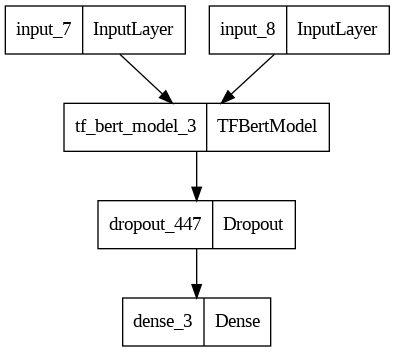

In [236]:
tf.keras.utils.plot_model(model)

# Training model

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(mode='min',patience=5)
history_bert = model.fit(
    [input_ids,attention_mask],
    np.array(train_tag),
    validation_data = ([val_input_ids,val_attention_mask],np.array(test_tag)),
    epochs = 25,
    batch_size = 30*2,
    callbacks = early_stopping,
    verbose = True
)

Epoch 1/25


1/1 [==============================] - 45s 45s/step - loss: 3.2363 - accuracy: 0.0078 - val_loss: 0.0201 - val_accuracy: 0.9922
Epoch 2/25


In [ ]:
model.save_weights("ner_bert_weights")

In [ ]:

import matplotlib.pyplot as plt
plt.plot(history_bert.history['accuracy'])
plt.plot(history_bert.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
plt.plot(history_bert.history['loss'])
plt.plot(history_bert.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [ ]:
def pred(val_input_ids,val_attention_mask):
    return model.predict([val_input_ids,val_attention_mask])

In [ ]:
def testing(val_input_ids,val_attention_mask,enc_tag,y_test):
    val_input = val_input_ids.reshape(1,128)
    val_attention = val_attention_mask.reshape(1,128)

    # Print Original Sentence
    sentence = tokenizer.decode(val_input_ids[val_input_ids > 0])
    print("Original Text : ",str(sentence))
    print("\n")
    true_enc_tag = enc_tag.inverse_transform(y_test)

    print("Original Tags : " ,str(true_enc_tag))
    print("\n")

    pred_with_pad = np.argmax(pred(val_input,val_attention),axis = -1)
    pred_without_pad = pred_with_pad[pred_with_pad>0]
    pred_enc_tag = enc_tag.inverse_transform(pred_without_pad)
    print("Predicted Tags : ",pred_enc_tag)


In [ ]:
index = 0
print(f"Validation input ids: \n", val_input_ids[index])
print(f"Validation attention masks: \n", val_attention_mask[index])
#print(f"Validation encrypted tag masks: \n", enc_tag[index])
print(f"Validation y_test masks: \n", y_test[index])


testing(val_input_ids[index],val_attention_mask[index],enc_tag,y_test[index])